In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import tensorflow as tf

In [462]:
df=pd.read_csv('D:\DataScience\June\Linear_Regression\House Price Prediction with keras\kc_house_data.csv')

In [463]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


## Exploratory Data Analysis

In [464]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [466]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [467]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [468]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [469]:
df.shape

(21613, 21)

In [470]:
df.drop_duplicates().shape

(21613, 21)

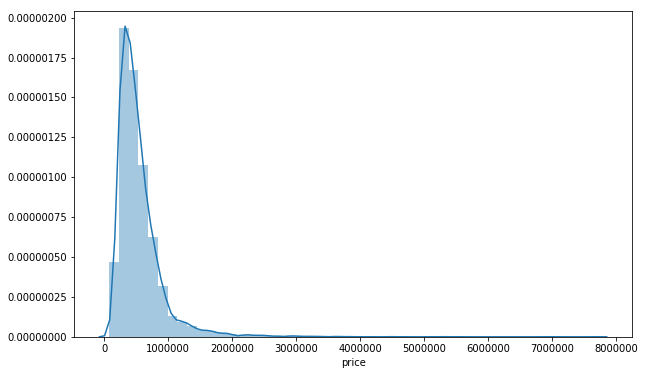

In [471]:
plt.figure(figsize=(10,6))
sns.distplot(df['price']);

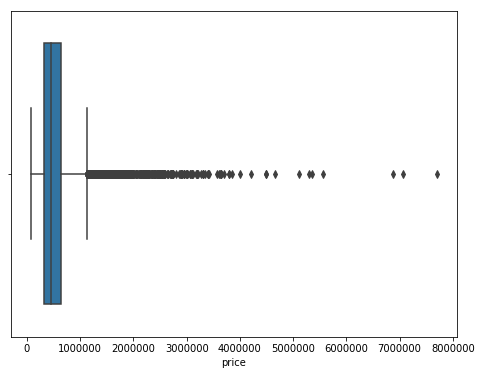

In [472]:
plt.figure(figsize=(8,6))
sns.boxplot(df['price']);

In [473]:
(df.price>3000000).value_counts()

False    21568
True        45
Name: price, dtype: int64

In [474]:
(df.price<2500000).value_counts()

True     21511
False      102
Name: price, dtype: int64

In [475]:
def detect_outliers(x,c=1.5):
    q1,q3=np.percentile(x,[25,75])
    iqr=(q3-q1)
    lob=q1-(iqr*c)
    uob=q3+(iqr*c)
    indices=np.where((x>uob)|(x<lob))
    return indices
price_outliers=detect_outliers(df['price'])
print(len(price_outliers[0]))  
    

1146


In [476]:
df.shape

(21613, 21)

In [477]:
df=df.drop(price_outliers[0])

In [478]:
df.shape

(20467, 21)

In [479]:
df.corr()['price'].sort_values(ascending=False).head(10)

price            1.000000
grade            0.631182
sqft_living      0.622333
sqft_living15    0.562090
sqft_above       0.530451
bathrooms        0.455927
lat              0.430762
bedrooms         0.296956
floors           0.273987
view             0.238268
Name: price, dtype: float64

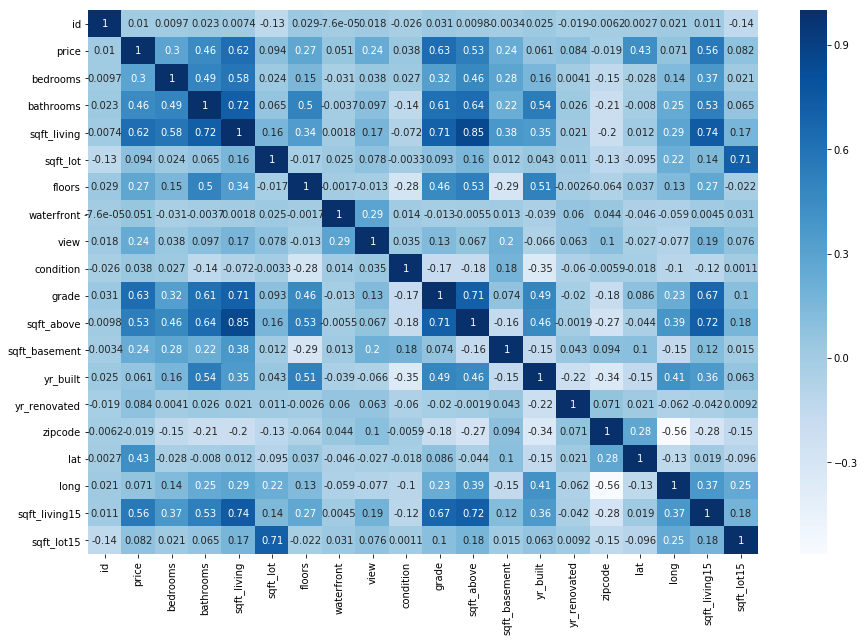

In [480]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

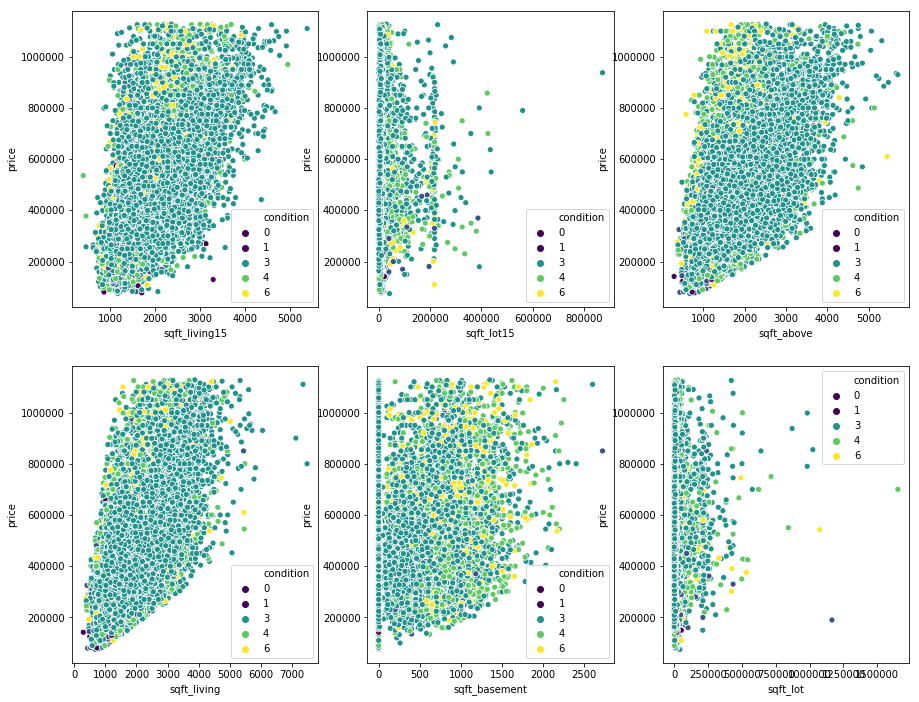

In [481]:
plt.figure(figsize=(15,12))
plt.subplot(231)
sns.scatterplot(y='price',x='sqft_living15',data=df,hue='condition',palette='viridis')

plt.subplot(232)
sns.scatterplot(y='price',x='sqft_lot15',data=df,hue='condition',palette='viridis')

plt.subplot(233)
sns.scatterplot(y='price',x='sqft_above',data=df,hue='condition',palette='viridis')

plt.subplot(234)
sns.scatterplot(y='price',x='sqft_living',data=df,hue='condition',palette='viridis')

plt.subplot(235)
sns.scatterplot(y='price',x='sqft_basement',data=df,hue='condition',palette='viridis')

plt.subplot(236)
sns.scatterplot(y='price',x='sqft_lot',data=df,hue='condition',palette='viridis')
plt.show()

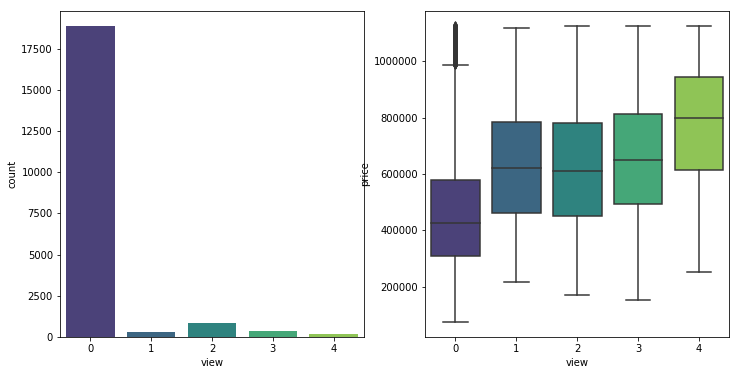

In [482]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='view',data=df,palette='viridis')
plt.subplot(122)
sns.boxplot(x='view',y='price',data=df,palette='viridis')
plt.show()

In [483]:
df.view.value_counts()

0    18884
2      810
3      350
1      276
4      147
Name: view, dtype: int64

In [484]:
df['view'].value_counts()

0    18884
2      810
3      350
1      276
4      147
Name: view, dtype: int64

In [485]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

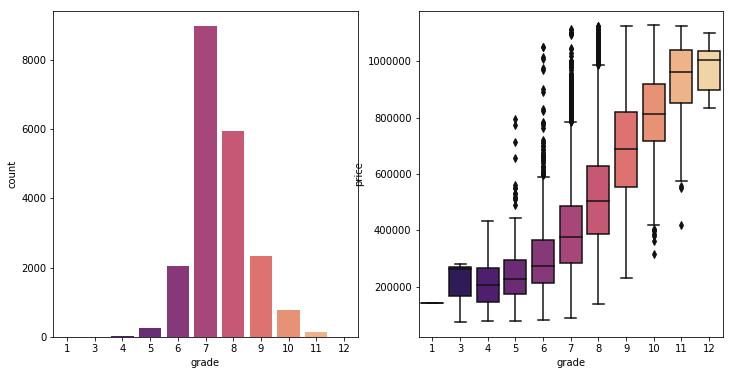

In [486]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='grade',data=df,palette='magma')
plt.subplot(122)
sns.boxplot(x='grade',y='price',data=df,palette='magma')
plt.show()

In [487]:
df.grade.value_counts()

7     8969
8     5948
9     2326
6     2037
10     768
5      242
11     139
4       29
12       5
3        3
1        1
Name: grade, dtype: int64

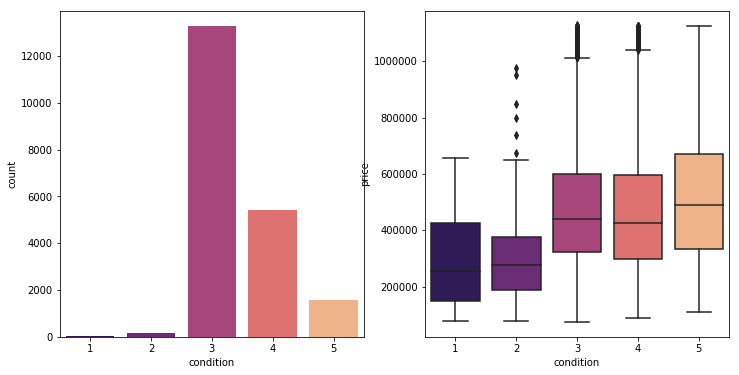

In [488]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='condition',data=df,palette='magma')
plt.subplot(122)
sns.boxplot(x='condition',data=df,y='price',palette='magma')
plt.show()

In [489]:
df.condition.value_counts()

3    13284
4     5423
5     1561
2      170
1       29
Name: condition, dtype: int64

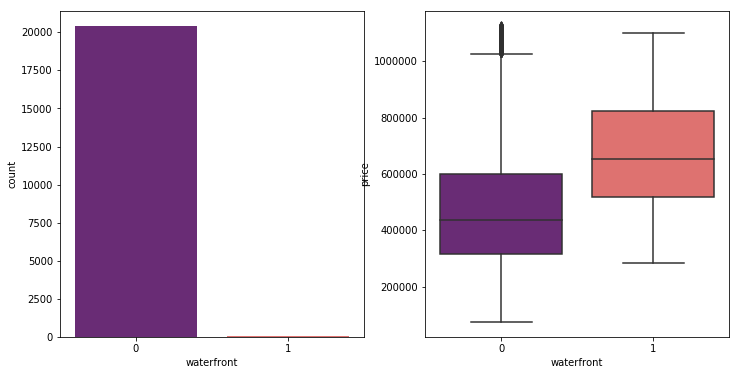

In [490]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='waterfront',data=df,palette='magma')
plt.subplot(122)
sns.boxplot(x='waterfront',y='price',data=df,palette='magma')
plt.show()

In [491]:
df.waterfront.value_counts()

0    20406
1       61
Name: waterfront, dtype: int64

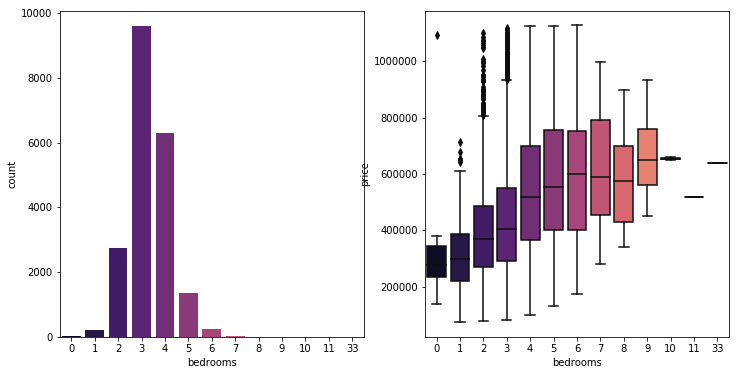

In [492]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='bedrooms',data=df,palette='magma')
plt.subplot(122)
sns.boxplot(x='bedrooms',y='price',data=df,palette='magma')
plt.show()

In [493]:
df.bedrooms.value_counts()

3     9597
4     6308
2     2736
5     1339
6      230
1      198
7       30
0       12
8        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

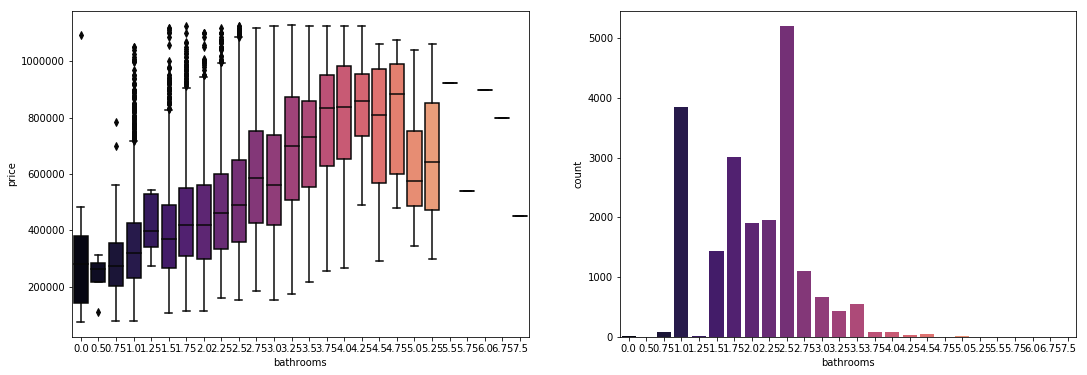

In [494]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x='bathrooms',y='price',data=df,palette='magma')
plt.subplot(122)
sns.countplot(x='bathrooms',data=df,palette='magma')
plt.show()

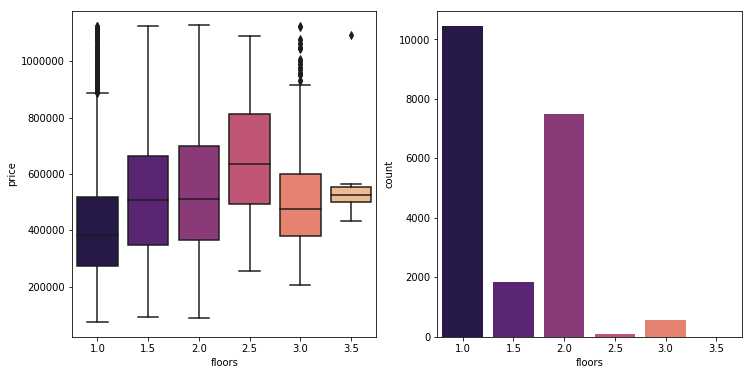

In [495]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(x='floors',y='price',data=df,palette='magma')
plt.subplot(122)
sns.countplot(x='floors',data=df,palette='magma')
plt.show()


In [496]:
df.floors.value_counts()

1.0    10448
2.0     7500
1.5     1829
3.0      573
2.5      110
3.5        7
Name: floors, dtype: int64

In [497]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

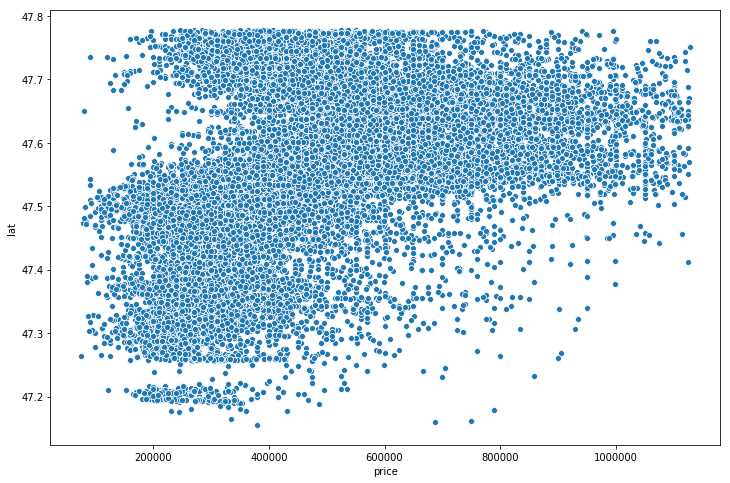

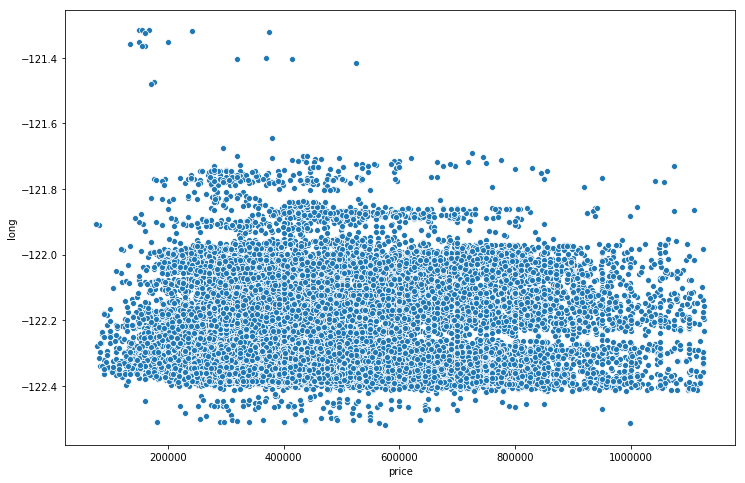

In [498]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df,palette='magma')
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df,palette='magama')
plt.show()

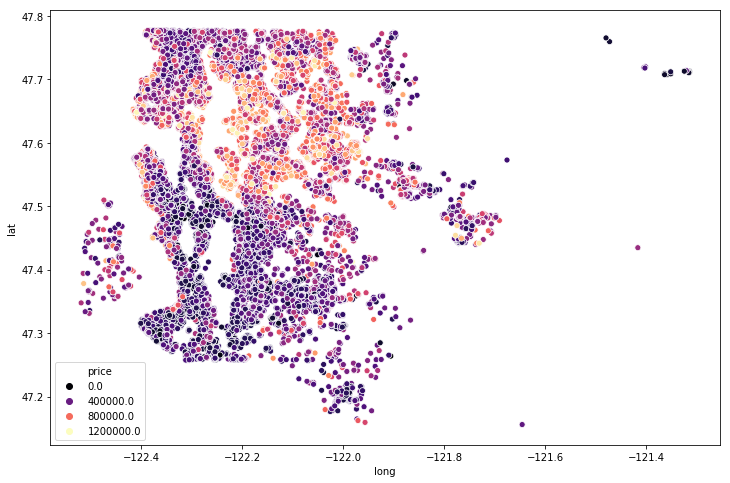

In [499]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='lat',x='long',hue='price',data=df,palette='magma')
plt.show()

## Working with the feature data


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20467 entries, 0 to 21612
Data columns (total 21 columns):
id               20467 non-null int64
date             20467 non-null object
price            20467 non-null float64
bedrooms         20467 non-null int64
bathrooms        20467 non-null float64
sqft_living      20467 non-null int64
sqft_lot         20467 non-null int64
floors           20467 non-null float64
waterfront       20467 non-null int64
view             20467 non-null int64
condition        20467 non-null int64
grade            20467 non-null int64
sqft_above       20467 non-null int64
sqft_basement    20467 non-null int64
yr_built         20467 non-null int64
yr_renovated     20467 non-null int64
zipcode          20467 non-null int64
lat              20467 non-null float64
long             20467 non-null float64
sqft_living15    20467 non-null int64
sqft_lot15       20467 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 4.1+ MB


In [501]:
df=df.drop('id',axis=1)

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20467 entries, 0 to 21612
Data columns (total 20 columns):
date             20467 non-null object
price            20467 non-null float64
bedrooms         20467 non-null int64
bathrooms        20467 non-null float64
sqft_living      20467 non-null int64
sqft_lot         20467 non-null int64
floors           20467 non-null float64
waterfront       20467 non-null int64
view             20467 non-null int64
condition        20467 non-null int64
grade            20467 non-null int64
sqft_above       20467 non-null int64
sqft_basement    20467 non-null int64
yr_built         20467 non-null int64
yr_renovated     20467 non-null int64
zipcode          20467 non-null int64
lat              20467 non-null float64
long             20467 non-null float64
sqft_living15    20467 non-null int64
sqft_lot15       20467 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.9+ MB


In [503]:
df.shape

(20467, 20)

## Feature Engineering from Date

In [504]:
df['date']=pd.to_datetime(df['date'])

In [505]:
df['month']=df['date'].dt.month

In [506]:
df['year']=df['date'].dt.year

In [507]:
df.shape

(20467, 22)

In [508]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


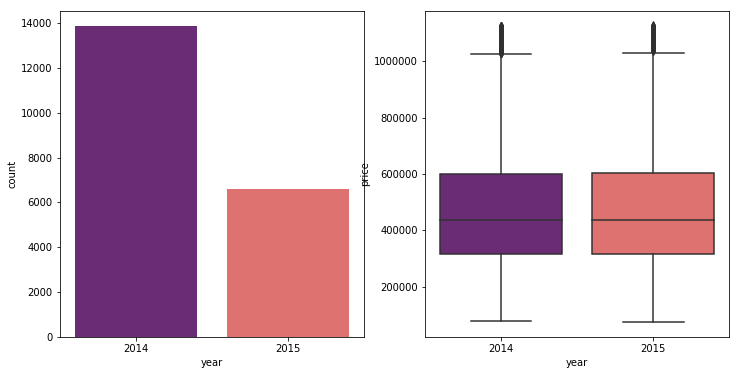

In [509]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='year',data=df,palette='magma')
plt.subplot(122)
sns.boxplot(x='year',y='price',data=df,palette='magma')
plt.show()

In [510]:
df.year.value_counts()

2014    13864
2015     6603
Name: year, dtype: int64

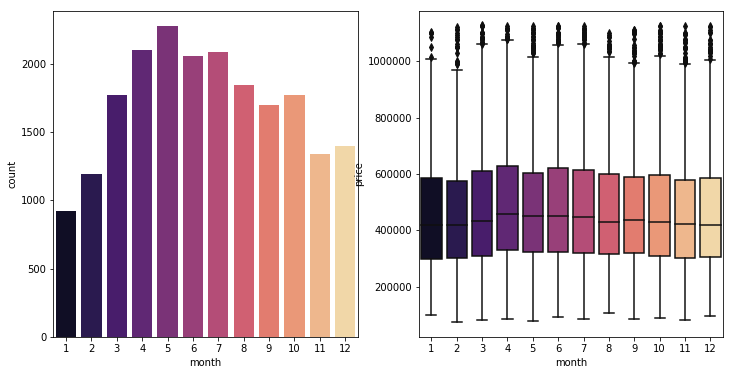

In [511]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='month',data=df,palette='magma')
plt.subplot(122)
sns.boxplot(x='month',y='price',data=df,palette='magma')
plt.show()

In [512]:
df.month.value_counts()

5     2275
4     2103
7     2089
6     2055
8     1847
10    1773
3     1772
9     1696
12    1395
11    1342
2     1195
1      925
Name: month, dtype: int64

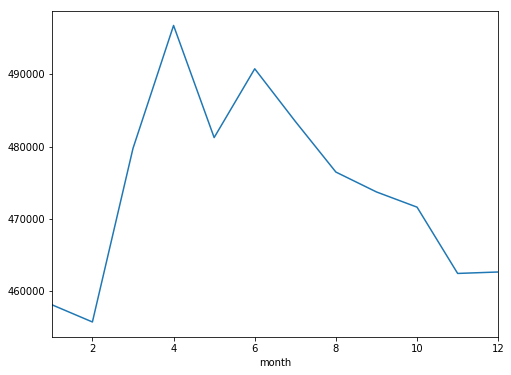

In [513]:
plt.figure(figsize=(8,6))
df.groupby('month').mean()['price'].plot()

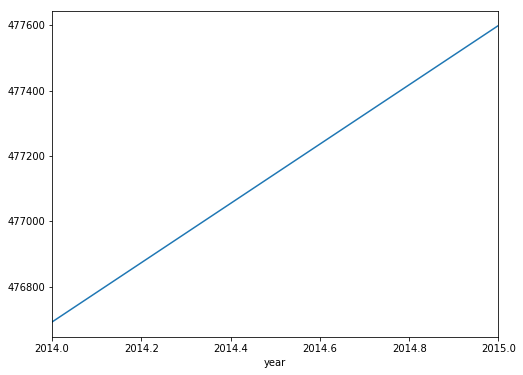

In [514]:
plt.figure(figsize=(8,6))
df.groupby('year').mean()['price'].plot()

In [515]:
df=df.drop('date',axis=1)

In [516]:
df.zipcode.value_counts()

98103    590
98038    588
98052    563
98115    558
98042    548
98117    543
98034    526
98118    502
98023    497
98133    494
98058    453
98059    452
98155    440
98074    423
98006    405
98056    403
98125    402
98027    394
98053    380
98033    369
98001    362
98126    354
98092    351
98106    335
98075    330
98144    319
98029    313
98116    313
98065    305
98146    283
        ... 
98107    262
98178    261
98136    257
98030    256
98166    247
98022    234
98177    231
98045    219
98002    199
98011    195
98019    190
98077    188
98108    186
98105    178
98112    170
98040    165
98004    154
98119    154
98005    153
98007    137
98188    136
98032    125
98014    121
98070    116
98010    100
98102     89
98109     86
98024     74
98148     57
98039      6
Name: zipcode, Length: 70, dtype: int64

In [517]:
df=df.drop('zipcode',axis=1)

In [518]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [519]:
df.yr_renovated.value_counts()

0       19701
2014       82
2013       34
2000       30
2007       29
2005       27
2003       23
1990       21
2004       21
2006       20
1989       18
2009       18
1983       17
1993       16
1987       15
1986       15
2001       15
1991       15
1985       15
1984       15
2015       15
1998       15
2010       14
1994       14
1997       14
1992       14
2011       13
2002       13
1988       13
1995       12
        ...  
1975        6
1978        6
1964        5
1973        5
1981        5
1969        4
1958        4
1963        4
1965        4
1953        3
1955        3
1945        3
1960        3
1972        3
1976        3
1957        3
1974        3
1971        2
1950        2
1946        2
1940        2
1962        2
1967        2
1951        1
1959        1
1956        1
1948        1
1944        1
1934        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

In [520]:
df['renovated']=df['yr_renovated'].apply(lambda yr:0 if yr==0 else 1)

In [521]:
df.renovated.value_counts()

0    19701
1      766
Name: renovated, dtype: int64

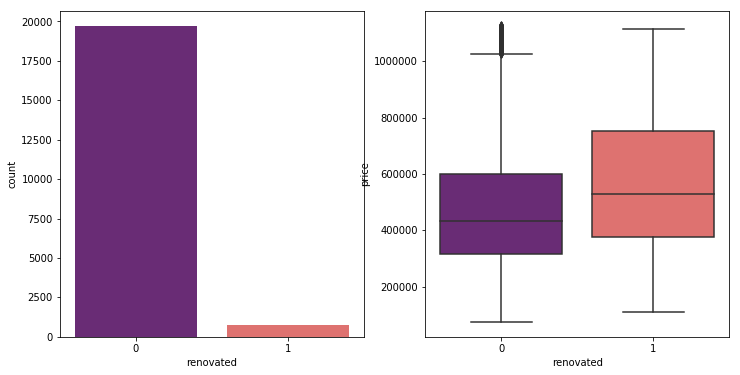

In [522]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='renovated',data=df,palette='magma')
plt.subplot(122)
sns.boxplot(x='renovated',y='price',data=df,palette='magma')
plt.show()

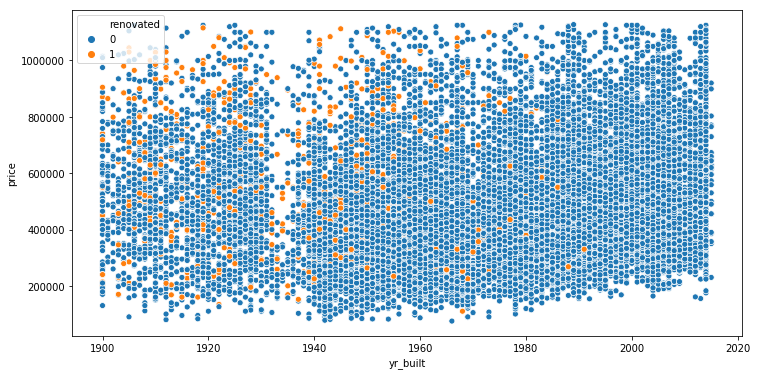

In [523]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='yr_built',y='price',hue='renovated',data=df)

In [524]:
x=df.drop('price',axis=1).values
y=df.price.values

In [525]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [526]:
x_train.shape

(16373, 20)

In [527]:
y_train.shape

(16373,)

In [528]:
x_test.shape

(4094, 20)

In [529]:
y_test.shape

(4094,)

## Bringing Features on to the Same Scale

In [530]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [531]:
np.min(x_train)

0.0

In [532]:
np.max(x_train)

1.0

In [533]:
y_train.shape

(16373,)

In [534]:
y_test.shape

(4094,)

In [535]:
x_train.shape

(16373, 20)

In [536]:
x_test.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [537]:
df.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
month            False
year             False
renovated        False
dtype: bool

In [538]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

In [539]:
model=Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [541]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
128/128 [==============================] - 0s 2ms/step - loss: 271299657728.0000 - val_loss: 269054705664.0000
Epoch 2/400
128/128 [==============================] - 0s 1ms/step - loss: 267769315328.0000 - val_loss: 257154170880.0000
Epoch 3/400
128/128 [==============================] - 0s 1ms/step - loss: 225316454400.0000 - val_loss: 168909176832.0000
Epoch 4/400
128/128 [==============================] - 0s 1ms/step - loss: 96445218816.0000 - val_loss: 38121779200.0000
Epoch 5/400
128/128 [==============================] - 0s 1ms/step - loss: 30828701696.0000 - val_loss: 28590825472.0000
Epoch 6/400
128/128 [==============================] - 0s 1ms/step - loss: 28857954304.0000 - val_loss: 28178466816.0000
Epoch 7/400
128/128 [==============================] - 0s 1ms/step - loss: 28408442880.0000 - val_loss: 27725754368.0000
Epoch 8/400
128/128 [==============================] - 0s 1ms/step - loss: 27942918144.0000 - val_loss: 27283742720.0000
Epoch 9/400
128/128 [=====

128/128 [==============================] - 0s 1ms/step - loss: 13826657280.0000 - val_loss: 13318922240.0000
Epoch 69/400
128/128 [==============================] - 0s 1ms/step - loss: 13800758272.0000 - val_loss: 13331155968.0000
Epoch 70/400
128/128 [==============================] - 0s 1ms/step - loss: 13783071744.0000 - val_loss: 13276350464.0000
Epoch 71/400
128/128 [==============================] - 0s 1ms/step - loss: 13757306880.0000 - val_loss: 13250288640.0000
Epoch 72/400
128/128 [==============================] - 0s 1ms/step - loss: 13748521984.0000 - val_loss: 13234598912.0000
Epoch 73/400
128/128 [==============================] - ETA: 0s - loss: 13695618048.000 - 0s 1ms/step - loss: 13724539904.0000 - val_loss: 13211976704.0000
Epoch 74/400
128/128 [==============================] - 0s 1ms/step - loss: 13712680960.0000 - val_loss: 13225538560.0000
Epoch 75/400
128/128 [==============================] - 0s 1ms/step - loss: 13684826112.0000 - val_loss: 13176668160.0000
Epo

128/128 [==============================] - 0s 1ms/step - loss: 13001059328.0000 - val_loss: 12515686400.0000
Epoch 135/400
128/128 [==============================] - 0s 1ms/step - loss: 13002084352.0000 - val_loss: 12535119872.0000
Epoch 136/400
128/128 [==============================] - 0s 1ms/step - loss: 12998294528.0000 - val_loss: 12498939904.0000
Epoch 137/400
128/128 [==============================] - 0s 1ms/step - loss: 12992535552.0000 - val_loss: 12490095616.0000
Epoch 138/400
128/128 [==============================] - 0s 1ms/step - loss: 12981389312.0000 - val_loss: 12488321024.0000
Epoch 139/400
128/128 [==============================] - 0s 1ms/step - loss: 12985072640.0000 - val_loss: 12529855488.0000
Epoch 140/400
128/128 [==============================] - 0s 1ms/step - loss: 12970931200.0000 - val_loss: 12489142272.0000
Epoch 141/400
128/128 [==============================] - 0s 1ms/step - loss: 12967863296.0000 - val_loss: 12497926144.0000
Epoch 142/400
128/128 [=======

128/128 [==============================] - 0s 1ms/step - loss: 12775917568.0000 - val_loss: 12337926144.0000
Epoch 201/400
128/128 [==============================] - 0s 1ms/step - loss: 12780189696.0000 - val_loss: 12307399680.0000
Epoch 202/400
128/128 [==============================] - 0s 1ms/step - loss: 12766198784.0000 - val_loss: 12289255424.0000
Epoch 203/400
128/128 [==============================] - 0s 1ms/step - loss: 12761720832.0000 - val_loss: 12289824768.0000
Epoch 204/400
128/128 [==============================] - 0s 1ms/step - loss: 12766675968.0000 - val_loss: 12365065216.0000
Epoch 205/400
128/128 [==============================] - 0s 1ms/step - loss: 12753256448.0000 - val_loss: 12318683136.0000
Epoch 206/400
128/128 [==============================] - 0s 1ms/step - loss: 12770639872.0000 - val_loss: 12280753152.0000
Epoch 207/400
128/128 [==============================] - 0s 1ms/step - loss: 12762496000.0000 - val_loss: 12305806336.0000
Epoch 208/400
128/128 [=======

128/128 [==============================] - 0s 1ms/step - loss: 12658560000.0000 - val_loss: 12193918976.0000
Epoch 267/400
128/128 [==============================] - 0s 1ms/step - loss: 12658030592.0000 - val_loss: 12195420160.0000
Epoch 268/400
128/128 [==============================] - 0s 1ms/step - loss: 12651900928.0000 - val_loss: 12166245376.0000
Epoch 269/400
128/128 [==============================] - 0s 1ms/step - loss: 12670485504.0000 - val_loss: 12190760960.0000
Epoch 270/400
128/128 [==============================] - 0s 1ms/step - loss: 12658392064.0000 - val_loss: 12150320128.0000
Epoch 271/400
128/128 [==============================] - 0s 1ms/step - loss: 12672716800.0000 - val_loss: 12173077504.0000
Epoch 272/400
128/128 [==============================] - 0s 2ms/step - loss: 12660686848.0000 - val_loss: 12182715392.0000
Epoch 273/400
128/128 [==============================] - 0s 1ms/step - loss: 12659800064.0000 - val_loss: 12149549056.0000
Epoch 274/400
128/128 [=======

128/128 [==============================] - 0s 1ms/step - loss: 12565881856.0000 - val_loss: 12061253632.0000
Epoch 333/400
128/128 [==============================] - 0s 1ms/step - loss: 12555284480.0000 - val_loss: 12046297088.0000
Epoch 334/400
128/128 [==============================] - 0s 1ms/step - loss: 12562429952.0000 - val_loss: 12043488256.0000
Epoch 335/400
128/128 [==============================] - 0s 1ms/step - loss: 12564822016.0000 - val_loss: 12047876096.0000
Epoch 336/400
128/128 [==============================] - 0s 1ms/step - loss: 12552316928.0000 - val_loss: 12070577152.0000
Epoch 337/400
128/128 [==============================] - 0s 1ms/step - loss: 12551460864.0000 - val_loss: 12047315968.0000
Epoch 338/400
128/128 [==============================] - 0s 1ms/step - loss: 12559646720.0000 - val_loss: 12067241984.0000
Epoch 339/400
128/128 [==============================] - 0s 1ms/step - loss: 12552216576.0000 - val_loss: 12067384320.0000
Epoch 340/400
128/128 [=======

128/128 [==============================] - 0s 1ms/step - loss: 12457745408.0000 - val_loss: 11945335808.0000
Epoch 399/400
128/128 [==============================] - 0s 1ms/step - loss: 12460575744.0000 - val_loss: 11940563968.0000
Epoch 400/400
128/128 [==============================] - 0s 1ms/step - loss: 12455775232.0000 - val_loss: 11940398080.0000


In [542]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             multiple                  420       
_________________________________________________________________
dense_46 (Dense)             multiple                  420       
_________________________________________________________________
dense_47 (Dense)             multiple                  420       
_________________________________________________________________
dense_48 (Dense)             multiple                  420       
_________________________________________________________________
dense_49 (Dense)             multiple                  21        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [543]:
losses=pd.DataFrame(model.history.history)

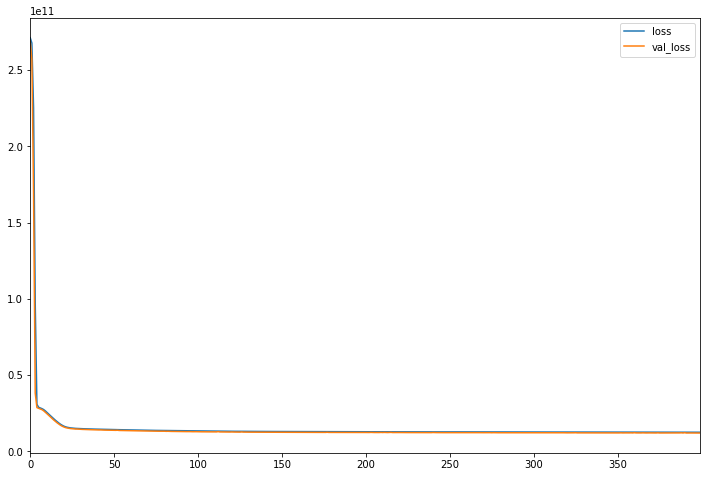

In [544]:
losses.plot(figsize=(12,8))

In [552]:
from sklearn import metrics 
def measure_accuracy(original,predicted,train=True):
    mae=metrics.mean_absolute_error(original,predicted)
    mse=metrics.mean_squared_error(original,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(original,predicted))
    r2score=metrics.r2_score(original,predicted)
    evs=metrics.explained_variance_score(original,predicted)
    if train:
        print('Training result..')
        print('.................')
        print('MAE: {0:0.3f}'.format(mae))
        print('MSE: {0:0.3f}'.format(mse))
        print('RMSE: {0:0.3f}'.format(rmse))
        print('r2_score: {0:0.3f}'.format(r2score))
        print('evs: {0:0.3f}'.format(evs))
    elif not train:
        print('Testing result...')
        print('.................')
        print('MAE: {0:0.3f}'.format(mae))
        print('MSE: {0:0.3f}'.format(mse))
        print('RMSE: {0:0.3f}'.format(rmse))
        print('r2_score: {0:0.3f}'.format(r2score))
        print('evs: {0:0.3f}'.format(evs))


## Predicting on New Data

In [553]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

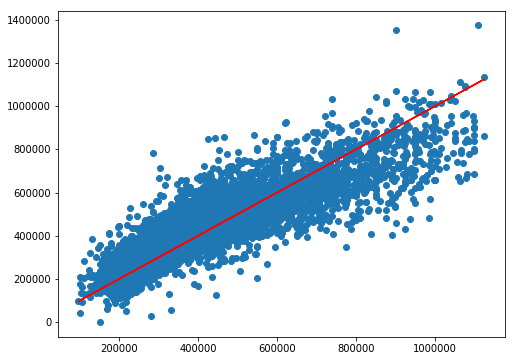

In [554]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r')

In [555]:
measure_accuracy(y_train,y_train_pred,train=True)
measure_accuracy(y_test,y_test_pred,train=False)

Training result..
.................
MAE: 82415.464
MSE: 12434250864.431
RMSE: 111508.972
r2_score: 0.714
evs: 0.714
Testing result...
.................
MAE: 81615.873
MSE: 11940397954.808
RMSE: 109272.128
r2_score: 0.725
evs: 0.725


In [558]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [560]:
measure_accuracy(y_train,y_pred_train,train=True)
measure_accuracy(y_test,y_pred_test,train=False)

Training result..
.................
MAE: 86506.176
MSE: 13151514545.936
RMSE: 114680.053
r2_score: 0.697
evs: 0.697
Testing result...
.................
MAE: 86703.548
MSE: 12873377482.398
RMSE: 113460.907
r2_score: 0.704
evs: 0.704
